In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%cd ../..

In [42]:
from src.sarsalambda import SarsaLambdaAgent
from src.qlearning import QLearningAgent
from src.utils import *
from src.plotting import *

import gym
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as mc

%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=80)

## SarsaLambda MountainCar

In [43]:
state_size = (10, 10)
env = DiscretizationWrapper(gym.make('MountainCar-v0'), state_size)

num_episodes = 2000
max_step = 1000
env.env._max_episode_steps = max_step

params = {
    "trace_decay": 0.9,
    "gamma": 0.9,
    "alpha": 0.01,
    "alpha_decay_rate": 0,
    "min_alpha": 0.1,
    "epsilon": 0.1,
    "epsilon_decay_rate": 0,
    "min_epsilon": 0.01
}

#params["epsilon_decay_rate"] = (params["epsilon"] - params["min_epsilon"])/(num_episodes//2)
params["alpha_decay_rate"] = (params["alpha"] - params["min_alpha"])/(num_episodes//2)



In [45]:
stats =   {
            "step":  np.zeros(num_episodes),
            "cumulative_reward":  np.zeros(num_episodes),
            "q_tables": np.zeros(shape = (num_episodes, ) + state_size + (env.action_space.n, )),
            "best_actions": []
            }

sl_agent = SarsaLambdaAgent(action_size=env.action_space.n, state_size=state_size, **params)

sl_agent.train(env, num_episodes, stats)

Episode 50/2000, Reward -1000.0, Average Max Reward: -1000.0, Total steps 1000.0, Epsilon: 0.10, Alpha: 0.01, Time 0.105
Episode 100/2000, Reward -1000.0, Average Max Reward: -691.9, Total steps 1000.0, Epsilon: 0.10, Alpha: 0.01, Time 0.104
Episode 150/2000, Reward -491.0, Average Max Reward: -387.7, Total steps 491.0, Epsilon: 0.10, Alpha: 0.01, Time 0.054
Episode 200/2000, Reward -323.0, Average Max Reward: -413.9, Total steps 323.0, Epsilon: 0.10, Alpha: 0.01, Time 0.034
Episode 250/2000, Reward -251.0, Average Max Reward: -301.5, Total steps 251.0, Epsilon: 0.10, Alpha: 0.01, Time 0.028
Episode 300/2000, Reward -494.0, Average Max Reward: -271.7, Total steps 494.0, Epsilon: 0.10, Alpha: 0.01, Time 0.057
Episode 350/2000, Reward -199.0, Average Max Reward: -179.5, Total steps 199.0, Epsilon: 0.10, Alpha: 0.01, Time 0.028
Episode 400/2000, Reward -299.0, Average Max Reward: -235.4, Total steps 299.0, Epsilon: 0.10, Alpha: 0.01, Time 0.044
Episode 450/2000, Reward -147.0, Average Max

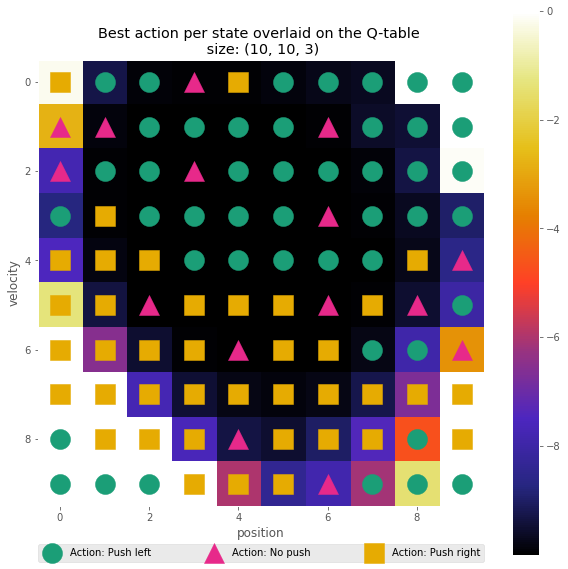

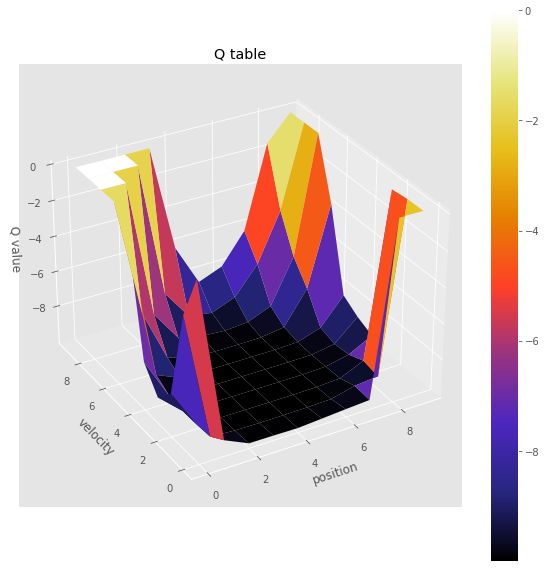

In [46]:
act_dict = {
    0: "Push left",
    1: "No push",
    2: "Push right"
}

act_symbol = {
    0:  "o",
    1: "^",
    2: "s",
}

#act_color = [plt.cm.viridis_r(i) for i in np.linspace(0.1, 1, 3, endpoint=False)]
act_color = cm.Dark2(np.linspace(0.1, 1, 3, endpoint=False))

plot_q_table(   q_table=stats["q_tables"][-1], 
                action_names=act_dict, 
                symbols=act_symbol, 
                colors=act_color,
                title="Best action per state overlaid on the Q-table",
                axis_names=["position", "velocity"])
plot_q_table_3d(q_table=stats["q_tables"][-1], 
                state_size=state_size,
                title="Q table",
                axis_names=["position", "velocity", "Q value"])

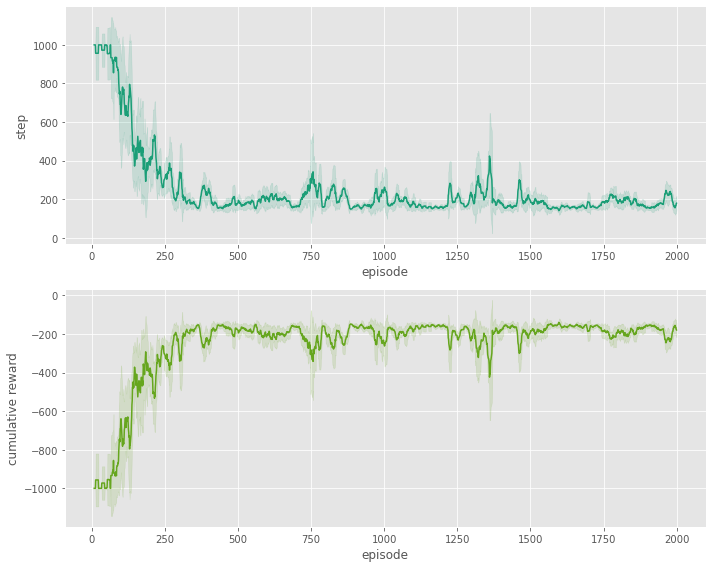

In [47]:
to_plot = ["step", "cumulative_reward"]

stats_to_plot = {key: value for key, value in stats.items() if key in to_plot}
plot_stats(stats_to_plot, figsize=(10, 8))